# DataLoader Demo
#### This project uses a custom DataLoader to load batches of aircraft images along with their labels.

In [1]:
import sys
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import yaml

import os

# Get the absolute path of the project root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), "..")) # Go up one level from the notebook directory.

# Add the project root to the Python path
sys.path.append(project_root)

from src.data_handler.dataloader import get_data_loaders

In [2]:
# split_data_dir = '../data/split'
split_data_dir = '/projects/dsci410_510/Levin_MAED/data/split'

train_loader, val_loader, test_loader, num_classes, mean, std = get_data_loaders(split_data_dir, 128, 5, full_transform=False)

print('\nNumber of classes:', num_classes)
print('\nMean:', mean)
print('\nStd:', std)
# get some random training images
images, labels = next(iter(train_loader))

print(f'\n{images.shape}')

Train directory: /projects/dsci410_510/Levin_MAED/data/split/train
Validation directory: /projects/dsci410_510/Levin_MAED/data/split/validation
Test directory: /projects/dsci410_510/Levin_MAED/data/split/test
Found 741 files in /projects/dsci410_510/Levin_MAED/data/split/train
Found 158 files in /projects/dsci410_510/Levin_MAED/data/split/validation
Found 161 files in /projects/dsci410_510/Levin_MAED/data/split/test

Number of classes: 2

Mean: tensor([0., 0., 0.])

Std: tensor([1., 1., 1.])

torch.Size([5, 3, 128, 128])


# Visualizing a Batch of Training Images

/tmp/ipykernel_1646158/1241819033.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plot_images = images * torch.tensor(std).view(1,3,1,1) + torch.tensor(mean).view(1,3,1,1)


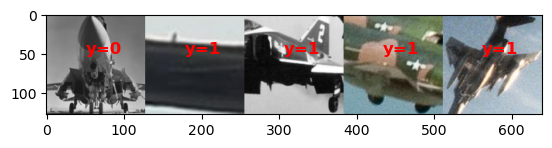

In [3]:
# plot images
plot_images = images * torch.tensor(std).view(1,3,1,1) + torch.tensor(mean).view(1,3,1,1)
plot_images = (plot_images * 255.0)
plot_images = plot_images.numpy().transpose(0, 2, 3, 1).astype(np.uint8)
plt.imshow(np.hstack(plot_images))
for index, l in enumerate(labels):
    plt.text(index*128+50, 50, "y="+str(l.item()), color='red', fontsize=12,fontweight='bold')
plt.show()